In [1]:
import os
import matplotlib.pylab as plt
from glob import glob
import numpy as np

In [2]:
PATH = os.path.abspath('data')

SOURCE_IMAGES = [os.path.join(PATH, "images/um")]

images = []
labels = []

for si in SOURCE_IMAGES:
    images.extend(glob(os.path.join(si, "*.png")))
    labels.extend(glob(os.path.join(si.replace("images/","labels/lane/"), "*.png")))
    
print("Datasets used: {}\n".format(SOURCE_IMAGES))

images.sort()
labels.sort()

Datasets used: ['/home/kenny/Desktop/carutils/data/images/um']



In [3]:
print(len(images))
print(len(labels))

95
95


In [69]:
def get_image(path):
    
    image = plt.imread(path)
    
    return(np.asarray(image[:320,:1152]))

In [70]:
def get_label(path):

    label = plt.imread(path, 0)
    
    return(np.asarray(label[:320,:1152]))

In [71]:
for i in images:
    print(get_image(i).shape)

(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152, 3)
(320, 1152

In [72]:
img = get_image(images[0])
img.dtype

dtype('float32')

In [73]:
print(get_image(images[83]).shape)
print(get_image(labels[84]).shape)

(320, 1152, 3)
(320, 1152, 3)


In [74]:
lbl = get_label(labels[0])
lbl.dtype
lbl.shape[:2]

(320, 1152)

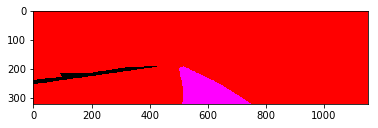

In [75]:
plt.imshow(lbl)

In [76]:
def rgbto2(lbl):
    w,h = lbl.shape[:2]
    out = np.zeros([w,h],dtype=np.int8)
    for i in range(w):
        for j in range(h):
            if(lbl[i,j,2] == 255):
                out[i,j] = 1
    return out

In [112]:
out = rgbto2(lbl)
out.shape

(320, 1152)

In [78]:
def preprocess_input(x):
    
    # Crop squared image
    h, w = x.shape[:2]

    x = x[:,(w-h)//2:(w-(w-h)//2),:]
    
    h, w = x.shape[:2]
    
    # Split images and masks into batches (optional)
    h_t, w_t = (512,512)
    split_factor = 4 # We crop this number of smaller images out of one
    x_t = np.zeros([split_factor, h_t, w_t, 3], dtype='uint8')
    
    x_t[0] = x[:h//2,:w//2,:]
    x_t[1] = x[:h//2,w//2:w,:]
    x_t[2] = x[h//2:h,:w//2,:]
    x_t[3] = x[h//2:h,w//2:w,:]
    
#     x_t = np.float32(x_t/255.)

    return(x_t)

In [79]:
x = get_image(images[0])

In [80]:
x = preprocess_input(x)

ValueError: could not broadcast input array from shape (160,160,3) into shape (512,512,3)

In [81]:
x.shape

(320, 1152, 3)

In [82]:
def preprocess_output(y):
    
    # Crop squared image
    h, w = y.shape[:2]

    y = y[:,(w-h)//2:(w-(w-h)//2)]
    
    h, w = y.shape[:2]
    
    # Split images and masks into batches (optional)
    h_t, w_t = (512,512)
    split_factor = 4 # We crop this number of smaller images out of one
    y_t = np.zeros([split_factor, h_t, w_t], dtype='uint8')
    
    y_t[0] = y[:h//2,:w//2]
    y_t[1] = y[:h//2,w//2:w]
    y_t[2] = y[h//2:h,:w//2]
    y_t[3] = y[h//2:h,w//2:w]
    
#     y_t = to_categorical(y_t, num_classes=9)
#     y_t = y_t.reshape(y_t.shape[:3] + (9,))
#     y_t = y_t.astype('int8')

    return(y_t)

In [83]:
y = get_label(labels[0])

In [84]:
y = preprocess_output(y)

ValueError: could not broadcast input array from shape (160,160,3) into shape (512,512)

In [85]:
y.shape

(320, 1152, 3)

In [86]:
from sklearn.model_selection import train_test_split

test_size = 0.25
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=test_size, random_state=1)

In [87]:
print(len(images_train))
print(len(labels_train))
print(len(images_test))
print(len(labels_test))

71
71
24
24


In [88]:
from albumentations import (
    HorizontalFlip,
    OpticalDistortion,
    RandomSizedCrop,
    ShiftScaleRotate,
    OneOf,
    Compose,
    CLAHE,
    RandomContrast,
    RandomGamma,
    RandomCrop
)

def augment_big(image, mask):
    
    aug = Compose([
        OpticalDistortion(p=0.5, distort_limit=0.25, shift_limit=0.5),
        OneOf([
            CLAHE(p=1., clip_limit=4.),
            RandomContrast(p=1., limit=0.25),
            RandomGamma(p=1., gamma_limit=(50,200))
            ], p=0.5),
        ], p=0.5)

    augmented = aug(image=image, mask=mask)

    image_heavy = augmented['image']
    mask_heavy = augmented['mask']
    
    return image_heavy, mask_heavy

def augment_small(image, mask):

    original_height, original_width = image.shape[:2]
    
    aug = HorizontalFlip(p=0.5)

    augmented = aug(image=image, mask=mask)

    image_heavy = augmented['image']
    mask_heavy = augmented['mask']
    
    return image_heavy, mask_heavy

In [89]:
batch_size = 1

In [156]:
from keras.utils import to_categorical

def train_generator(images_path, labels_path, batch_size = 1):
    
    while True:
        ids = np.random.randint(0, len(images_path), batch_size)
        
        image_batch = np.take(images_path, ids)
        label_batch = np.take(labels_path, ids)
        
        batch_input = np.zeros([batch_size, 320, 1152, 3], dtype='uint8')
        batch_output = np.zeros([batch_size, 320, 1152, 3], dtype='uint8')

        # READ Images and masks:
        for i in range(len(image_batch)):
            inp = get_image(image_batch[i])
            batch_input[i] = inp
            outp = get_label(label_batch[i])
            batch_output[i] = outp

        # Albumentations augmentation:
        for i in range(len(batch_input)):
            batch_input[i], batch_output[i]  = augment_big(batch_input[i], batch_output[i])
        
        # Preprocess Images and masks:
#         inp = []
#         outp = []
#         for i in range(len(batch_input)):
#             inp.extend(preprocess_input(batch_input[i]))
#             outp.extend(preprocess_output(batch_output[i]))
            
        inp = np.asarray(batch_input)
        outp = np.asarray(batch_output)

        # Return a tuple of (input,output) to feed the network
#         ids = np.random.randint(0, batch_size*4, batch_size)
        
        batch_x = np.array(inp)
        batch_y = np.array(outp)
        
#         batch_x = np.take(batch_x, ids, axis = 0)
#         batch_y = np.take(batch_y, ids, axis = 0)
        
        out_x = np.zeros_like(batch_x)
        out_y = np.zeros_like(batch_y)
        
        # AUGMENT
        for i in range(len(batch_x)):
            image_heavy, mask_heavy  = augment_small(batch_x[i], batch_y[i])
            out_x[i] = image_heavy
            out_y[i] = mask_heavy
            
        out_x = np.float32(out_x/255.)
        
#         print(out_y[0].shape)
        
        out_y = to_categorical(rgbto2(out_y[0]), num_classes=2)
#         print(out_y.shape)
        out_y = out_y.reshape([1,320,1152,2])
        out_y = out_y.astype('int8')
#         print(out_y.shape)
        
        yield(out_x, out_y)      
#         return(out_x, out_y)

In [150]:
train_gen = train_generator(images_path=images_train, labels_path=labels_train, batch_size=1)

In [151]:
train_gen[1].dtype

TypeError: 'generator' object is not subscriptable

In [157]:
def val_generator(images_path, labels_path, batch_size = 1):
            
    while True:
        ids = np.random.randint(0, len(images_path), batch_size)
        
        image_batch = np.take(images_path, ids)
        label_batch = np.take(labels_path, ids)
        
        batch_input = np.zeros([batch_size, 320, 1152, 3], dtype='uint8')
        batch_output = np.zeros([batch_size, 320, 1152, 3], dtype='uint8')

        # READ Images and masks:
        for i in range(len(image_batch)):
            inp = get_image(image_batch[i])
            batch_input[i] = inp
            outp = get_label(label_batch[i])
            batch_output[i] = outp

        # Albumentations augmentation:
        for i in range(len(batch_input)):
            batch_input[i], batch_output[i]  = augment_big(batch_input[i], batch_output[i])
        
        # Preprocess Images and masks:
#         inp = []
#         outp = []
#         for i in range(len(batch_input)):
#             inp.extend(preprocess_input(batch_input[i]))
#             outp.extend(preprocess_output(batch_output[i]))
            
        inp = np.asarray(batch_input)
        outp = np.asarray(batch_output)

        # Return a tuple of (input,output) to feed the network
#         ids = np.random.randint(0, batch_size*4, batch_size)
        
        out_x = np.array(inp)
        out_y = np.array(outp)
        
#         batch_x = np.take(batch_x, ids, axis = 0)
#         batch_y = np.take(batch_y, ids, axis = 0)    
            
        out_x = np.float32(out_x/255.)
        
#         print(out_y[0].shape)
        
        out_y = to_categorical(rgbto2(out_y[0]), num_classes=2)
#         print(out_y.shape)
        out_y = out_y.reshape([1,320,1152,2])
        out_y = out_y.astype('int8')
#         print(out_y.shape)
        
        yield(out_x, out_y)      
#         return(out_x, out_y)

In [153]:
train_gen = train_generator(images_path=images_train, labels_path=labels_train, batch_size=1)

In [154]:
val_gen = val_generator(images_path=images_test, labels_path=labels_test, batch_size=1)

In [140]:
val_gen[1].shape

(1, 320, 1152, 2)

In [143]:
train_gen[1][0].shape

(320, 1152, 2)

In [137]:
print(train_gen[0].shape)
print(train_gen[1].shape)
print(val_gen[0].shape)
print(val_gen[1].shape)

(1, 320, 1152, 3)
(1, 320, 1152, 2)
(1, 320, 1152, 3)
(1, 320, 1152, 2)


In [164]:
import webcolors

def colorize(mask):
    hex_colors = ['#000000', '#50E3C2']

    rgb_colors = []

    for hex_color in hex_colors:
        rgb_colors.append(webcolors.hex_to_rgb(hex_color))
        
    colors = np.array(rgb_colors)
        
    colorMask = np.zeros([mask.shape[0], mask.shape[1], 3],dtype=np.uint8)
    for r in range(mask.shape[0]):
        for c in range(mask.shape[1]):
            colorMask[r,c,] = colors[mask[r,c]]

    return colorMask

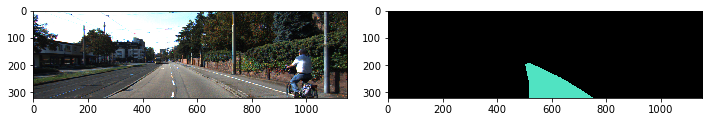

In [165]:
img = 0

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(get_image(images[img]))
axes[1].imshow(colorize(rgbto2(get_label(labels[img]))))
fig.tight_layout()

In [161]:
get_label(labels[img]).shape

(320, 1152, 3)

In [145]:
from models.Unet import unet

model = unet(input_size = (320,1152,3), n_classes=2)

print("Model summary:")
model.summary()

# In[ ]:
from keras import optimizers

#model.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

learning_rate = 1e-4
optimizer = optimizers.Adam(lr = learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']

print("Optimizer: {}, learning rate: {}, loss: {}, metrics: {}\n".format(optimizer, learning_rate, loss, metrics))

model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

Model summary:
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_19 (InputLayer)            (None, 320, 1152, 3)  0                                            
____________________________________________________________________________________________________
conv2d_313 (Conv2D)              (None, 320, 1152, 64) 1792        input_19[0][0]                   
____________________________________________________________________________________________________
conv2d_314 (Conv2D)              (None, 320, 1152, 64) 36928       conv2d_313[0][0]                 
____________________________________________________________________________________________________
max_pooling2d_73 (MaxPooling2D)  (None, 160, 576, 64)  0           conv2d_314[0][0]                 
____________________________________________________________________________

In [146]:
steps_per_epoch = len(images_train)//batch_size*2
validation_steps = len(images_test)//batch_size
epochs = 1
verbose = 1

In [155]:
history = model.fit_generator(
    train_gen,
    validation_data = val_gen,
    steps_per_epoch = steps_per_epoch,
    validation_steps = validation_steps,
    epochs = epochs,
    verbose = 1
)

Epoch 1/1
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
  1/142 [..............................] - ETA: 4301s - loss: 0.6929 - acc: 0.8357(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
  2/142 [..............................] - ETA: 2340s - loss: 0.6811 - acc: 0.8904(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
  3/142 [..............................] - ETA: 1686s - loss: 0.6843 - acc: 0.9089(320, 1152, 3)
(368640, 2)
(1, 320, 1152, 2)
  4/142 [..............................] - ETA: 1356s - loss: 0.6855 - acc: 0.9175(320, 1152, 3)
(368640, 2)
(1, 3

KeyboardInterrupt: 